# Bobina Perpendicular


[afsf](#another_cell)

### Grafico `streamlines` [*](#stream)

### Grafico `quiver` [*](#quiver)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos
from numpy import sin
from numpy import sinh
from numpy import cosh
from numpy import exp
from numpy import pi
from numpy.fft import fftshift,ifftshift,fftfreq
from numpy.fft import ifft2



![](https://github.com/carabedo/labs/raw/master/img/2.png)

In [2]:
# bob perpendisular
xo=2e-3
yo=2e-3
zo=2e-3
c=2e-3
zc=4.5e-3
N=400

#propiedades de la probeta
mur=1;
sigma=35.4e6;
mu0=4*np.pi*10e-7;
z=0
f=10000; #frec
I=1e-3; #corriente
w=2*np.pi*f;



In [3]:
k=lambda a,b : np.sqrt(a**2+b**2);
l=lambda a,b : np.sqrt(a**2+b**2 + 1j*w*mur*mu0*sigma);

# b=0 tira nan
Ds=lambda a,b : (1j*mu0*N*I*A(a,b)*sin(a*xo)*exp(-k(a,b)*zc))/(pi*pi*c*2*xo*b*(k(a,b))**3);
 
A= lambda a,b : (-b*cos(b*(yo+c))*sinh(k(a,b)*(zo+c)) +  b*cos(b*yo)*sinh(k(a,b)*zo) +   k(a,b)*sin(b*(yo+c))*cosh(k(a,b)*(zo+c)) - k(a,b)*sin(b*yo)*cosh(k(a,b)*zo)      )/(a**2+2*(b**2))

# ec 8
fl=lambda a,b : (2*k(a,b)*mur)/(k(a,b)*mur+l(a,b));

def fxab(a,b):
    return 2*w*sigma*Ds(a,b)*fl(a,b)*exp(l(a,b)*z)*b

def fyab(a,b):
    return -2*w*sigma*Ds(a,b)*fl(a,b)*exp(l(a,b)*z)*a

def getk(t):
    N=len(t)
    dt=t[1]-t[0]
    k = fftfreq(N,d=dt)
    return fftshift(k[1:])

def getk2(t):
    N=len(t)
    dt=t[1]-t[0]
    k = fftfreq(N,d=dt)
    return fftshift(k)  

In [4]:
xm=6e-3
xv=np.linspace(-xm,xm,200)
yv=np.linspace(-xm,xm,200)
av,bv=getk(xv),getk(yv)


ifx = fxab(av[:,None], bv[None,:])
ify = fyab(av[:,None], bv[None,:])

Jx,Jy=fftshift(ifft2(ifftshift(np.nan_to_num(ifx.T)))).real,fftshift(ifft2(ifftshift(np.nan_to_num(ify.T)))).real

<a id='quiver'>Grafico quiver</a>


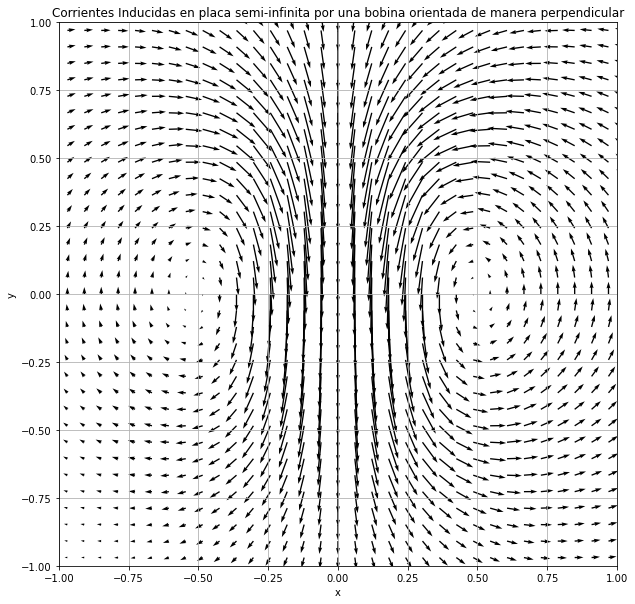

In [5]:
xv,yv=getk2(av),getk2(bv)

plt.figure(figsize=[10,10])
plt.quiver(xv/(1e-3),yv/(1e-3),Jx,Jy)
plt.title('Corrientes Inducidas en placa semi-infinita por una bobina orientada de manera perpendicular')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.grid(True)
plt.savefig('perpendicular.png')

### Streamlines <a id='stream'></a>


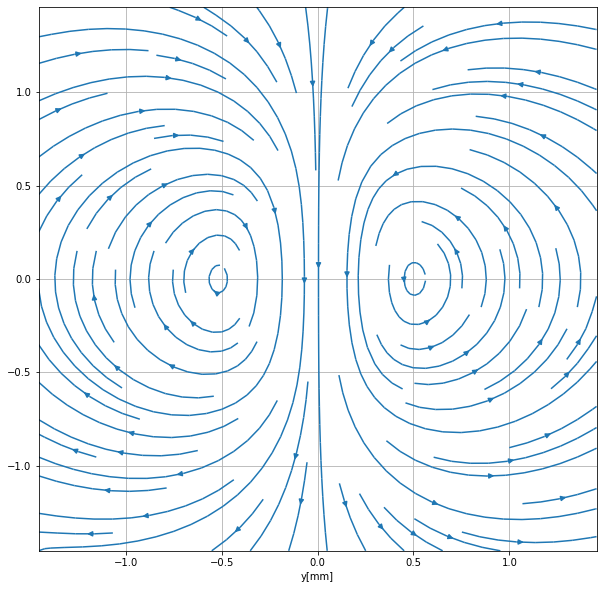

In [7]:
lim=1.5
xvmm=xv/1e-3
yvmm=yv/1e-3
xx=xvmm[np.abs(xvmm) <lim]
yy=yvmm[np.abs(yvmm) <lim]
jxx,jyy=Jx[np.abs(xvmm) <lim][:,np.abs(xvmm) <lim],Jy[np.abs(xvmm) <lim][:,np.abs(xvmm) <lim]
plt.figure(figsize=[10,10])
plt.streamplot(xx,yy,jxx,jyy)
plt.xlabel('x[mm]')
plt.xlabel('y[mm]')
plt.grid(True)